In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.tree import DecisionTreeClassifier

In [49]:
df = pd.read_csv("C:/Users/musma/OneDrive/Desktop/DS/DS Project/Medicaldataset.csv")
df

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative
...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,negative
1315,66,1,84,125,55,149.0,1.33,0.172,positive
1316,45,1,85,168,104,96.0,1.24,4.250,positive
1317,54,1,58,117,68,443.0,5.80,0.359,positive


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1319 non-null   int64  
 1   Gender                    1319 non-null   int64  
 2   Heart rate                1319 non-null   int64  
 3   Systolic blood pressure   1319 non-null   int64  
 4   Diastolic blood pressure  1319 non-null   int64  
 5   Blood sugar               1319 non-null   float64
 6   CK-MB                     1319 non-null   float64
 7   Troponin                  1319 non-null   float64
 8   Result                    1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


In [51]:
df.shape

(1319, 9)

In [52]:
df.duplicated().sum()

np.int64(0)

In [53]:
df.describe(include = "all")

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,positive
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,810
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942,NaN
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568,NaN
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000,NaN
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000,NaN
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000,NaN
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500,NaN


### Attempt 01

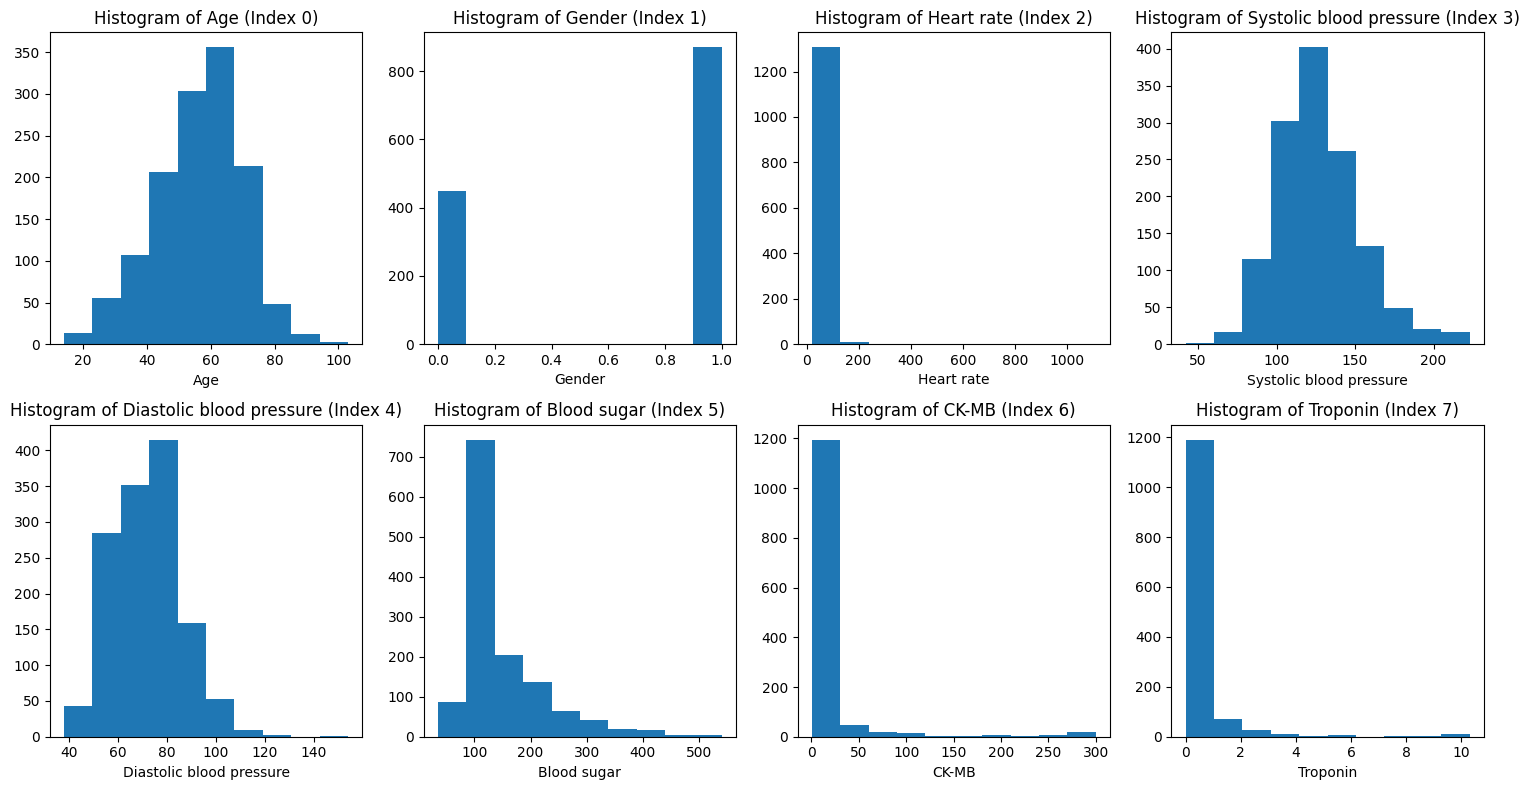

In [54]:
fig, ax = plt.subplots(2, 4, figsize=(15, 8))
ax = ax.flatten() 

for i, col in enumerate(df.columns[:8]):  
    ax[i].hist(df[col])
    ax[i].set_xlabel(col)
    ax[i].set_title(f"Histogram of {col} (Index {i})")

plt.tight_layout()
plt.show()


In [55]:
X = df.drop("Result", axis = 1)
Y = df["Result"]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [56]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=5, n_estimators=100, random_state=42, oob_score=True)
model.fit(X_train, Y_train)
print(f"OOB Score: {model.oob_score_}")

OOB Score: 0.9867298578199052


In [57]:
y_pre = model.predict(X_test)

In [58]:
print(f"Test Accuracy: {accuracy_score(Y_test, y_pre)}")
print(f"OOB Score: {model.oob_score_}")

Test Accuracy: 0.9734848484848485
OOB Score: 0.9867298578199052


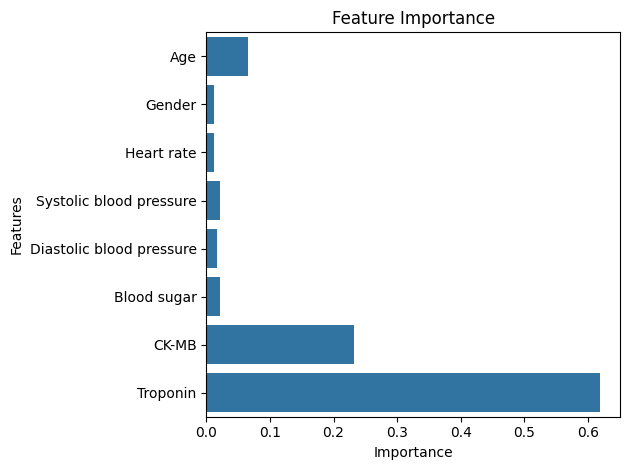

In [59]:
features = pd.Series(model.feature_importances_, index = X.columns)
sns.barplot(x = features, y = features.index)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

In [60]:
# Training accuracy
y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(Y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

# Testing accuracy
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(Y_test, y_test_pred)
print("Testing Accuracy:", test_accuracy)


Training Accuracy: 0.9924170616113744
Testing Accuracy: 0.9734848484848485


Cross Validation Scores: [0.98104265 0.98578199 0.98104265 0.99526066 0.99052133]
Mean CV Score: 0.9867298578199051
Confusion Matrix:
 [[ 97   4]
 [  3 160]]


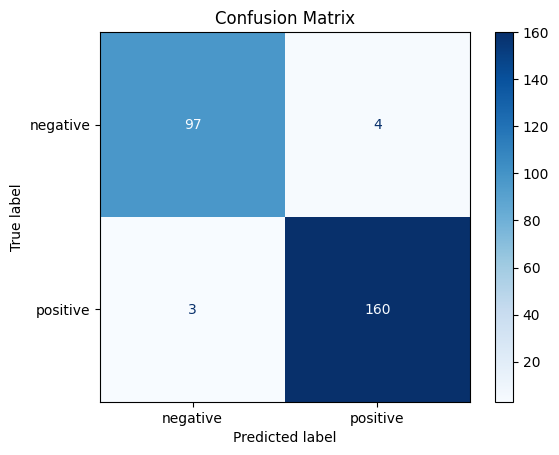

Classification Report:
               precision    recall  f1-score   support

    negative       0.97      0.96      0.97       101
    positive       0.98      0.98      0.98       163

    accuracy                           0.97       264
   macro avg       0.97      0.97      0.97       264
weighted avg       0.97      0.97      0.97       264



In [61]:
cv_scores = cross_val_score(model, X_train, Y_train, cv=5)
print("Cross Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

# Confusion Matrix
cm = confusion_matrix(Y_test, y_pre)
print("Confusion Matrix:\n", cm)

# Display Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(Y_test, y_pre))

In [13]:
def evaluate_model(model):
    print("Please enter the following details for prediction:")

    age = float(input("Enter your Age "))
    gender  = input("Gender (Male / Female)")
    heart_rate = float(input("Heart Rate: "))
    systolic_blood_pressure  = float(input("Systolic Blood Pressure: "))
    diastolic_blood_pressure = float(input("Diastolic Blood Pressure: "))
    blood_sugar = float(input("Blood Sugar: "))
    ck_mb = float(input("CK-MB: "))
    troponin = float(input("Troponin: "))
    
    if gender.lower() == "male":
        gender = 1
    else:
        gender = 0

    input_df = pd.DataFrame([[age, gender, heart_rate, systolic_blood_pressure,
                               diastolic_blood_pressure, blood_sugar, ck_mb, troponin]],
                               columns = ["Age", "Gender", "Heart rate", "Systolic blood pressure",
                                     "Diastolic blood pressure", "Blood sugar", "CK-MB", "Troponin"])
    
    prediction = model.predict(input_df)

    print(f"Predicted Result {prediction[0]}")

evaluate_model(model)

Please enter the following details for prediction:
Predicted Result positive


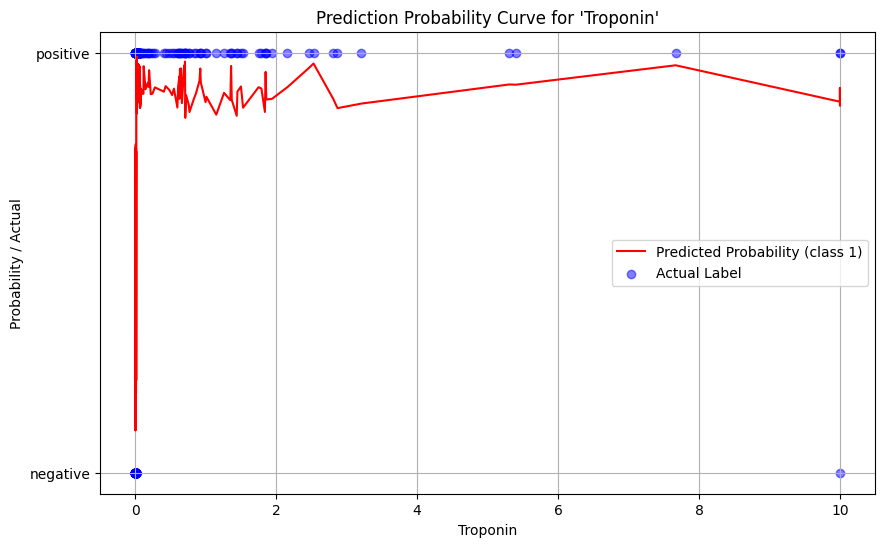

In [64]:
# Choose a feature to visualize
feature_name = X.columns[7] 

# Sort test data for line plotting
sorted_indices = X_test[feature_name].argsort()
X_sorted = X_test.iloc[sorted_indices]
Y_sorted = Y_test.iloc[sorted_indices]

# Get probability predictions
probs = model.predict_proba(X_sorted)[:, 1]  # Probabilities for class 1

# Plot
plt.figure(figsize=(10, 6))
plt.plot(X_sorted[feature_name], probs, color='red', label='Predicted Probability (class 1)')
plt.scatter(X_sorted[feature_name], Y_sorted, color='blue', alpha=0.5, label='Actual Label')
plt.xlabel(feature_name)
plt.ylabel("Probability / Actual")
plt.title(f"Prediction Probability Curve for '{feature_name}'")
plt.legend()
plt.grid(True)
plt.show()
